In [1]:
!git config --global user.name "romenlaw"
!git config --global user.email "e"
TOKEN='github_pat_'
!git clone https://$TOKEN@github.com/romenlaw/NaiveNeuralNetwork

Cloning into 'NaiveNeuralNetwork'...
remote: Enumerating objects: 167, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 167 (delta 9), reused 11 (delta 5), pack-reused 144
Receiving objects: 100% (167/167), 572.91 KiB | 3.60 MiB/s, done.
Resolving deltas: 100% (75/75), done.


In [2]:
%cd /content/NaiveNeuralNetwork

/content/NaiveNeuralNetwork


In [36]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	modified:   nnn.py

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	__pycache__/



In [35]:
!git add nnn.py visualiser.py

In [37]:
!git commit -m "add __repr__"

[main a8b02ff] add __repr__
 1 file changed, 22 insertions(+), 4 deletions(-)


In [38]:
!git push origin main

Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 621 bytes | 621.00 KiB/s, done.
Total 3 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/romenlaw/NaiveNeuralNetwork
   7722c7d..a8b02ff  main -> main


## housekeeping

In [4]:
import sys
sys.path.append('/content/NaiveNeuralNetwork')

%load_ext autoreload
%autoreload 2

In [31]:
from nnn import *
from visualiser import *

In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = (5,3)

###  Multi-class Classifier Demo

In [7]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
np.random.seed(1337)
random.seed(1337)

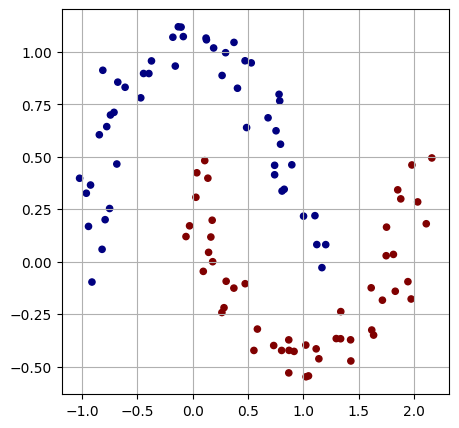

In [9]:
# make up a dataset

from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=100, noise=0.1)

y = y*2 - 1 # make y be -1 or 1
# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [32]:
# initialize a model
model = MLP(2, [16, 16, 1]) # 2-layer neural network
print(model)
print("number of parameters", len(model.parameters()))

MLP[nin=2, n_layers=3]: [
 Layer[0,2 x 16, non_linear=True]: [Neuron[L0,0,non_linear=True], Neuron[L0,1,non_linear=True], Neuron[L0,2,non_linear=True], Neuron[L0,3,non_linear=True], Neuron[L0,4,non_linear=True], Neuron[L0,5,non_linear=True], Neuron[L0,6,non_linear=True], Neuron[L0,7,non_linear=True], Neuron[L0,8,non_linear=True], Neuron[L0,9,non_linear=True], Neuron[L0,10,non_linear=True], Neuron[L0,11,non_linear=True], Neuron[L0,12,non_linear=True], Neuron[L0,13,non_linear=True], Neuron[L0,14,non_linear=True], Neuron[L0,15,non_linear=True]], 
 Layer[1,16 x 16, non_linear=True]: [Neuron[L1,0,non_linear=True], Neuron[L1,1,non_linear=True], Neuron[L1,2,non_linear=True], Neuron[L1,3,non_linear=True], Neuron[L1,4,non_linear=True], Neuron[L1,5,non_linear=True], Neuron[L1,6,non_linear=True], Neuron[L1,7,non_linear=True], Neuron[L1,8,non_linear=True], Neuron[L1,9,non_linear=True], Neuron[L1,10,non_linear=True], Neuron[L1,11,non_linear=True], Neuron[L1,12,non_linear=True], Neuron[L1,13,non_lin

In [33]:
# loss function
def loss(batch_size=None):

    # inline DataLoader :)
    if batch_size is None:
        Xb, yb = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    inputs = [list(map(Scalar, xrow)) for xrow in Xb]

    # forward the model to get scores
    scores = list(map(model, inputs))

    # svm "max-margin" loss
    losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))
    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss

    # also get accuracy
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

total_loss, acc = loss()
print(total_loss, acc)

: 0.7158806086932654 0.67


In [34]:
# optimization
for k in range(100):

    # forward
    total_loss, acc = loss()

    # backward
    model.zero_grad()
    total_loss.backward()

    # update (sgd)
    learning_rate = 1.0 - 0.9*k/100
    for p in model.parameters():
        p.data -= learning_rate * p.grad

    if k % 1 == 0:
        print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")


step 0 loss 0.7158806086932654, accuracy 67.0%
step 1 loss 0.7181563851481185, accuracy 82.0%


KeyboardInterrupt: 

(-1.548639298268643, 1.951360701731357)

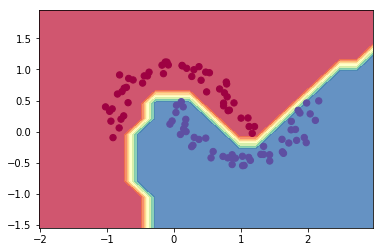

In [ ]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
